## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import datetime as dt
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
ZHVI_FILE = 'Zip_Zhvi_SingleFamilyResidence.csv'
ZHVI_URL = 'http://files.zillowstatic.com/research/public/Zip/' + ZHVI_FILE
ZHVI_FP = './data/' + ZHVI_FILE

### (Optional) Refresh Data

In [3]:
urllib.request.urlretrieve(ZHVI_URL, ZHVI_FP);

## Bay Area SFH Prices

In [3]:
df = pd.read_csv(ZHVI_FP)
metros = ['San Francisco', 'San Jose']
df = df[df['Metro'].isin(metros)]

### Metros

In [4]:
df2 = df.groupby('Metro').aggregate(np.median).iloc[:, df.columns.get_loc('1996-04'):]
df2.columns = df2.columns.map(lambda x: dt.datetime.strptime(x, '%Y-%m'))

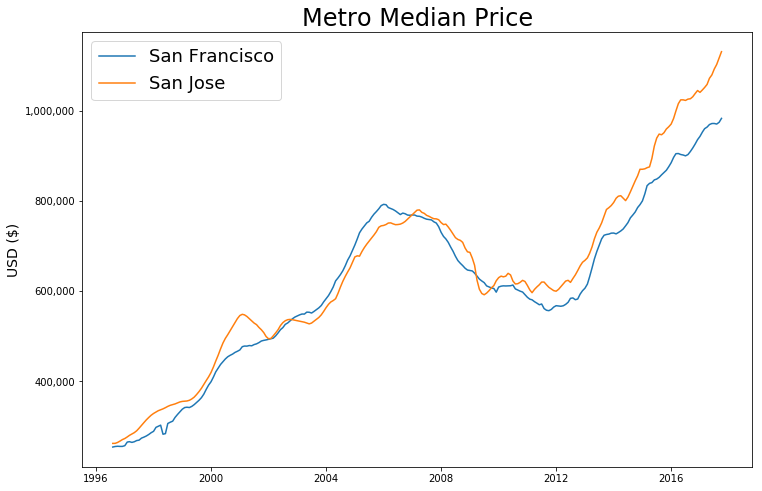

In [5]:
plt.figure()
ax = plt.subplot(111)
ax.plot(
    df2.columns.to_pydatetime(), df2.loc['San Francisco', :].values,
    df2.columns.to_pydatetime(), df2.loc['San Jose', :].values)
ax.legend(metros, prop={'size': 18})
ax.set_ylabel('USD ($)', fontsize=14)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('Metro Median Price', fontsize=24)
plt.show()

### County

In [6]:
df3 = df.groupby('CountyName').aggregate(np.median).iloc[:, df.columns.get_loc('1996-04'):]
df3.columns = df3.columns.map(lambda x: dt.datetime.strptime(x, '%Y-%m'))

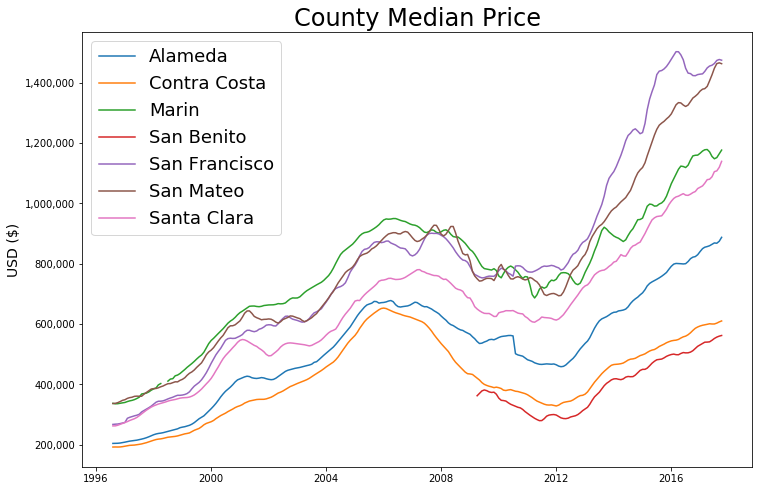

In [7]:
plt.figure()
ax = plt.subplot(111)
for county in df3.index:
    ax.plot(df3.columns.to_pydatetime(), df3.loc[county, :].values, label = county)
ax.legend(prop={'size': 18})
ax.set_ylabel('USD ($)', fontsize=14)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('County Median Price', fontsize=24)
plt.show()